In [1]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mapclassify as mc

/home/ec2-user/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/geo_env/lib/python3.9/site-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


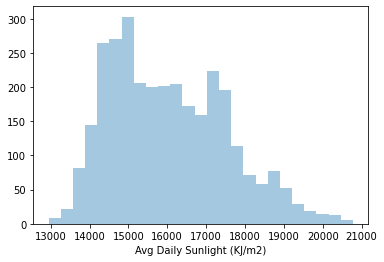

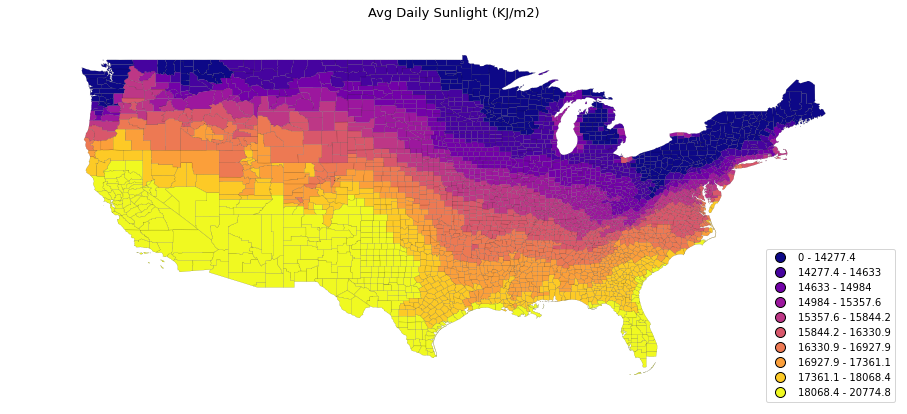

In [2]:
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
#gplt.polyplot(geoData, figsize=(20, 4));

# Read file
weather_data = pd.read_csv('data/sunlight_data.txt', sep='\t')
# Show the distribution of unemployment rate

sns.distplot( weather_data["Avg Daily Sunlight (KJ/m2)"], hist=True, kde=False, rug=False );

fullData = geoData.merge(weather_data, left_on=['id'], right_on=['County Code']);

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
scheme = mc.Quantiles(fullData['Avg Daily Sunlight (KJ/m2)'], k=10)

gplt.choropleth(fullData, 
    hue="Avg Daily Sunlight (KJ/m2)", 
    linewidth=.1,
    scheme=scheme, cmap='plasma',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Avg Daily Sunlight (KJ/m2)', fontsize=13);
